#### 실험계획
1) 인자 별로 y에 대한 영향력이 어느 정도 신뢰수준으로 파악 가능한가.
2) 인자 영향력 파악 신뢰수준 높이려면 진행해야 하는 실험 조건은? 
3) 인자의 level별 그룹분석 할 때 다른 인자 조건이 다 달라도 그냥 해당 인자 기준으로 분포차이 분석해도 괜찮을까?


- statistical power가 낮다 == 유의미한 차이가 있는데 알아차리지 못한다.

1) effect size : 모집단에 결과가 분포하는 정량적 수치
(quantified magnitude of a result present in the population)
2) sample size : 표본 샘플 수
3) significance: 분석결과가 유의미한 정도
4) statistical power: 반대가정을 받아들일 수 있는 확률

power analysis - 4개 중에서 3값이 있을 때 다른 한 값을 예측하는 분석기법

# DOE(Design Of Experiment, 실험계획법)
 - 효율적인 실험 방법을 설계하고 결과제를 제대로 분석하는 것을 목표로 하는 실험 분야
 - 실험의 독립변수 X, 종속변수를 y라고 하자
 - DOE를 진행하기 전에 두가지를 정해야 한다. <br>
   1) Y관한 어떤 모델을 만들고 싶은가(ex number of polynomial terms) <br>
   2) x값의 범위, level <br>
 - 실험계획법은 크게 두가지로 나눌 수 있다. <br>
   1) Screening DOE: 초기 주요 영향변수를 알아내기 위한 실험계획법 <br>
   2) Augment DOE: 추가적인 실험을 진행하기 위한 실험계획법

# 일반적인 실험계획법
1) OFAT(Changing one factor at a time)
단점: 인자간의 interaction을 파악 불가능
ex) 온도와 압력을 조절해볼 떄 한값씩만 흔들어보면 두 인자간의 synergistic effect는 파악 불가능
타겟에 도달하기 위해서는 인자간의 연관작용까지 고려해야 하는데 OFAT는 최대성능 확보 어려움

2) best guess approach
한두인자 바꿔보고 다음 실험할 때 지금 실험의 최적값부터 다시 흔들어보는 방식
단점: 최적 솔루션이라는 보장이 없음. 타겟확보 못하고 인자만 자꾸 흔들어보는 경우가 생길 수 있음

3) OFAT + Best guess approach로 실험하는 과정 예시
 - 온도를 흔들어보면서 타겟에 가까워지다가 감소하면 흔들기 멈춤, 이번에는 물질을 흔들어보면서 최적값 찾는다.
 - 위와같은 실험을 할 경우 최적값이 전 영역의 optimal값이 아닌 지역적인 optimal한 값으로 만족해야한다.
 - 특히 흔들어야 하는 인자가 많은데 OFAT + Best guess approach를 할 경우 실험수가 많아질 것임

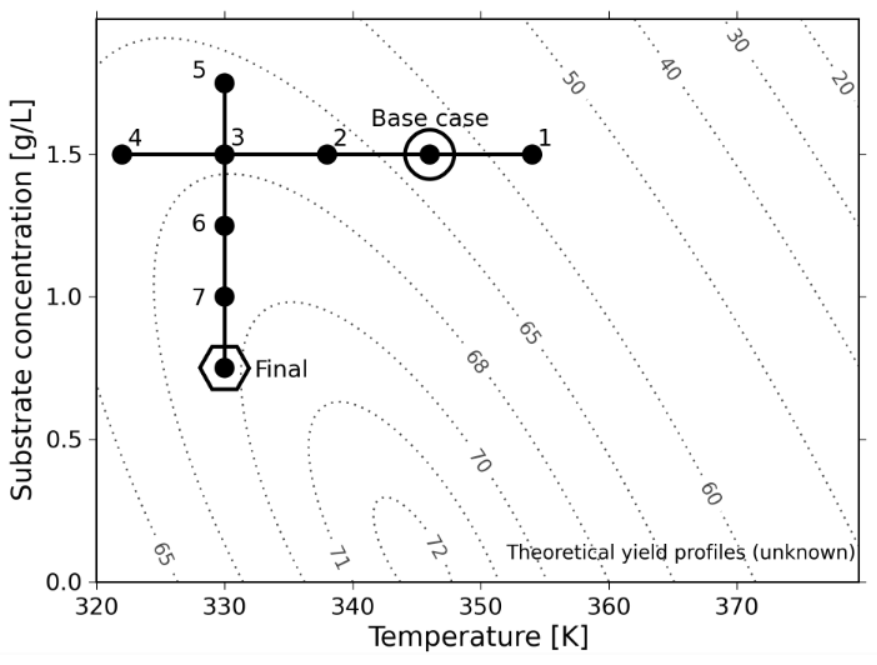

 - 참고: https://www.coursera.org/learn/experimentation 
 <br>
 https://learnche.org/pid/design-analysis-experiments/changing-one-single-variable-at-a-time
 <br>
 https://learnche.org/pid/design-analysis-experiments/fractional-factorial-designs/index

# Augment DOE

# 실험추가 방법 1 - 실험안한 영역 추가하기
1. 고정시키고 싶은 변수, value 입력
2. 그 변수 제외하고 전체 실험 변수 pdb design으로 실험값 만들기
3. pandas drop duplicate로 기존 존재 포인트는 제외
4. sns pair plot으로 영역 보여주기

In [45]:
dir(build)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'box_behnken',
 'build_box_behnken',
 'build_central_composite',
 'build_frac_fact_res',
 'build_full_fact',
 'build_halton',
 'build_lhs',
 'build_maximin',
 'build_plackett_burman',
 'build_random_k_means',
 'build_space_filling_lhs',
 'build_sukharev',
 'build_uniform_random',
 'central_composite',
 'frac_fact_res',
 'full_fact',
 'halton',
 'lhs',
 'maximin',
 'plackett_burman',
 'random_k_means',
 'space_filling_lhs',
 'sukharev',
 'uniform_random']

In [47]:
# 전영역 pbd 2 level doe 짜기
from doepy import build

# doe 짜기
doe_dict = {}
for col in xcols: 
    doe_dict[col] = [df[col].min(), df[col].max()]
doe_df = build.full_fact(pbd_dict)
doe_df

,A,B,C,D,E,F
0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,1.0,1.0,1.0,1.0,1.0
2,1.0,2.0,1.0,1.0,1.0,1.0
3,2.0,2.0,1.0,1.0,1.0,1.0
4,1.0,1.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...
59,2.0,2.0,1.0,2.0,2.0,2.0
60,1.0,1.0,2.0,2.0,2.0,2.0
61,2.0,1.0,2.0,2.0,2.0,2.0
62,1.0,2.0,2.0,2.0,2.0,2.0


In [5]:
import seaborn as sns
import pandas as pd
df = pd.read_csv("ofat_data.csv")

# sns.pairplot(df, corner=True)

# 고정시키고 싶은 변수, value 입력 
# 고정할 변수 제외하고 xcols list로 저장
xcols = ['A', 'B', 'C', 'D', 'E', 'F','G']
default_xcols = ['G']
default_value = [1]
for col in default_xcols:
    xcols.remove(col)
xcols

# ! pip install doepy

# 전영역 pbd 2 level doe 짜기
from doepy import build

# doe 짜기
pbd_dict = {}
for col in xcols: 
    pbd_dict[col] = [df[col].min(), df[col].max()]
pbd_df = build.plackett_burman(pbd_dict)

# 고정시킨 변수 추가하기
for cnt in range(len(default_xcols)): 
    pbd_df[default_xcols[cnt]] =  default_value[cnt]

df['label'] = 'origin'
pbd_df['label'] = 'add'
pbd_df2 = pd.concat([df ,pbd_df])
add_df = pbd_df2.drop_duplicates(subset=pbd_df2.columns.difference(['Response', 'label']))
print(len(add_df ), len(pbd_df2 ))
# sns.pairplot(add_df[add_df.columns.difference(['Response']+default_xcols)], corner=True, hue='label')
add_df

15 16


,A,B,C,D,E,F,G,Response,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1,6.5,origin
1,2.0,1.0,1.0,1.0,1.0,1.0,1,7.5,origin
2,2.0,2.0,1.0,1.0,1.0,1.0,1,6.7,origin
3,2.0,1.0,2.0,1.0,1.0,1.0,1,6.9,origin
4,2.0,1.0,1.0,2.0,1.0,1.0,1,10.1,origin
5,2.0,1.0,1.0,2.0,2.0,1.0,1,9.8,origin
6,2.0,1.0,1.0,2.0,1.0,2.0,1,10.0,origin
7,2.0,1.0,1.0,2.0,1.0,1.0,2,9.9,origin
0,1.0,1.0,2.0,1.0,2.0,2.0,1,NaN,add
1,2.0,1.0,1.0,1.0,1.0,2.0,1,NaN,add


## 1. Mutivariate Bayesian Optimization
 - 모든 실험 영역을 골고루 찾는 것이 아닌, 원하는 최적 타겟 값이 존재할 만한 영역만 찾는 방식
 
 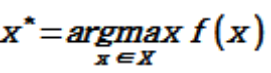
 - 현재까지의 데이터 기반으로 모델을 만들고, 모델의 불확실한 영역을 최소화 + 최적 값이 존재하는 영역을 다음 실험값으로 추천하는 방식이다.  
 - f(x)가 최대인 지점을 찾는 것을 목표라고 해보자. 아래 그림에서 모델의 mean, covariance 값이 큰 위치를 새로운 관측값으로 추가한다. 
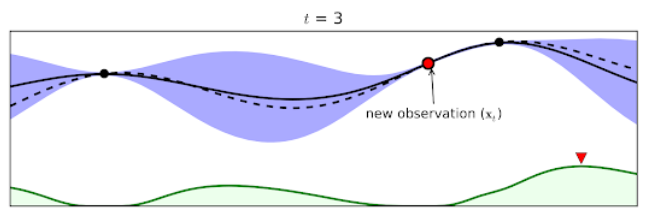

 - 그 다음 mean, covariance가 큰 지점을 또다시 추가하면서 관측값이 전역적인 최적값 위치로 가는것을 볼 수 있음
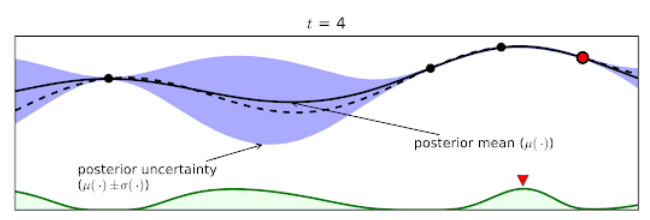
ref: https://sonsnotation.blogspot.com/2020/11/12-bayesian-optimization.html

#### 사용되는 함수
 - surrogate function: 사전 데이터(prior)로 만든 확률 모델 kernel을 무얼 쓰냐에 따라 다양하게 만들 수 있음
 - Acquisition function: 다음 관측치를 선택하기 위한 함수. 위의 그림에서 초록색 그래프

#### 베이지안 최적화  open source

 - SMAC : http://www.cs.ubc.ca/labs/beta/Projects/SMAC/
 - Hyperopt: http://jaberg.github.io/hyperopt/
 - Spearmint: https://github.com/JasperSnoek/spearmint/
 - Bayesopt:  http://rmcantin.bitbucket.org/
 - Bayeso: https://github.com/jungtaekkim/bayeso

# 파이썬으로 다변량 베이지안 최적화 해보기
ref: https://optilog.tistory.com/33

In [62]:
import pandas as pd
import warnings
# 경고창 숨기기
warnings.filterwarnings('ignore') 
from scipy.stats import norm
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

X = np.array(df[df.columns.difference(['Response', 'label'])])
y = np.array(df['Response'])

# 5. Instantiate Gaussian Process model
model = GaussianProcessRegressor(kernel=RBF(1.0))

for i in np.arange(5):
	# 6. Fit to data
    model.fit(X, y)
    
    # 7. Acquisition Function
    doe_dict = {}
    for col in df.columns.difference(['Response', 'label']): 
        doe_dict[col] = [df[col].min(), df[col].max()]
    x_df = build.full_fact(doe_dict)
    
    xs = np.array(x_df)
    mean, std = model.predict(xs, return_std=True)
    acq = expected_improvement(mean, std, y.max())
    
    # 8. Query Objective Function
    x_new = xs[acq.argmax()].reshape(1,-1)
    y_new = f(x_new)
    
    # 9. Augment Data
    X = np.append(X, x_new, axis=0)
    y = np.append(y, np.array([y_new]))

data2 = pd.DataFrame(X[num:])
data2.columns = df.columns.difference(['Response', 'label'])
data2['label'] = 'bayesian'

In [64]:
final_add_df = pd.concat([add_df, data2])
final_add_df

,A,B,C,D,E,F,G,Response,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.5,origin
1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,7.5,origin
2,2.0,2.0,1.0,1.0,1.0,1.0,1.0,6.7,origin
3,2.0,1.0,2.0,1.0,1.0,1.0,1.0,6.9,origin
4,2.0,1.0,1.0,2.0,1.0,1.0,1.0,10.1,origin
5,2.0,1.0,1.0,2.0,2.0,1.0,1.0,9.8,origin
6,2.0,1.0,1.0,2.0,1.0,2.0,1.0,10.0,origin
7,2.0,1.0,1.0,2.0,1.0,1.0,2.0,9.9,origin
0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,NaN,add
1,2.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,add


<Axes: xlabel='A', ylabel='Response'>

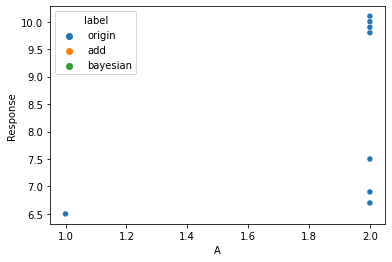

In [67]:
sns.scatterplot(data =final_add_df, x = 'A', y = 'Response', hue='label')

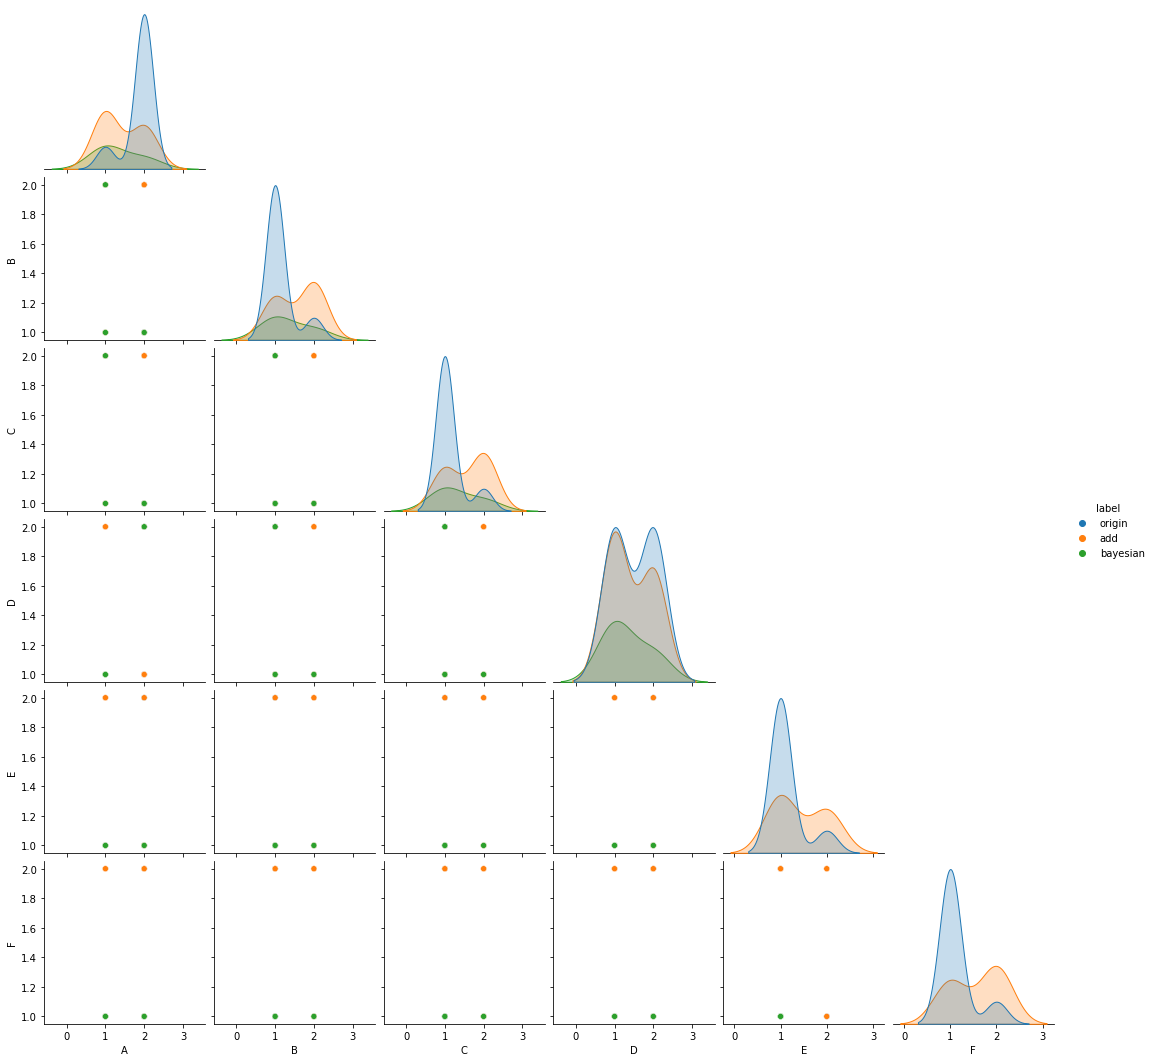

In [65]:
sns.pairplot(final_add_df[final_add_df.columns.difference(['Response']+default_xcols)], corner=True, hue='label')

In [6]:

# 5. Instantiate Gaussian Process model
model = GaussianProcessRegressor(kernel=RBF(1.0))

for i in np.arange(5):
	# 6. Fit to data
    model.fit(X, y)
    
    # 7. Acquisition Function
    x1s = np.random.uniform(min_x1, max_x1, 10000)
    x2s = np.random.uniform(min_x2, max_x2, 10000)
    xs = np.array([x1s, x2s]).transpose()
    mean, std = model.predict(xs, return_std=True)
    acq = expected_improvement(mean, std, y.max())
    
    # 8. Query Objective Function
    x_new = xs[acq.argmax()].reshape(1,-1)
    y_new = f(x_new)
    
    # 9. Augment Data
    X = np.append(X, x_new, axis=0)
    y = np.append(y, np.array([y_new]))

data2 = pd.DataFrame(X[num:])

data2.columns = ['x1', 'x2']
data2['y'] = y[num:]
data2['label'] = 'add'
data['label'] = 'origin'


# 9. Get optimal result
print("Optimal")
print("X: ",X[y.argmax()])
print("y: ",y.max())

Optimal
X:  [5.6913033 6.7946109]
y:  2.785442941175052


#### 기존 데이터(origin)과 샤로운 추천값(new)를 보면 x1, x2 조건이 적으면서, y를 최대로 하는 포인트를 추천한 것 볼 수 있음

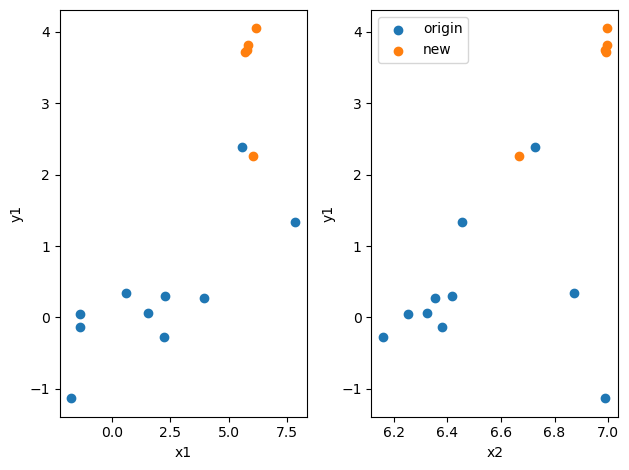

In [41]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.scatter(data['x1'],data['y'], label='origin')
plt.scatter(data2['x1'],data2['y'], label='new')
plt.xlabel('x1')
plt.ylabel('y1')

plt.subplot(122)
plt.scatter(data['x2'],data['y'], label='origin')
plt.scatter(data2['x2'],data2['y'], label='new')
plt.xlabel('x2')
plt.ylabel('y1')
plt.legend()
plt.tight_layout()